In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3.CLEANING DATA
DIAGNOSE DATA for CLEANING¶
We need to diagnose and clean data before exploring.
Unclean data:

Column name inconsistency like upper-lower case letter or space between words
missing data
different language

We will use head, tail, columns, shape and info methods to diagnose data

In [3]:
data = pd.read_csv('pokemon.csv')
data.head()  # head shows first 5 rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [5]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
data.shape #row and column

(800, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [10]:
print(data['Type 1'].value_counts(dropna= False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


<AxesSubplot: title={'center': 'Attack'}, xlabel='Legendary'>

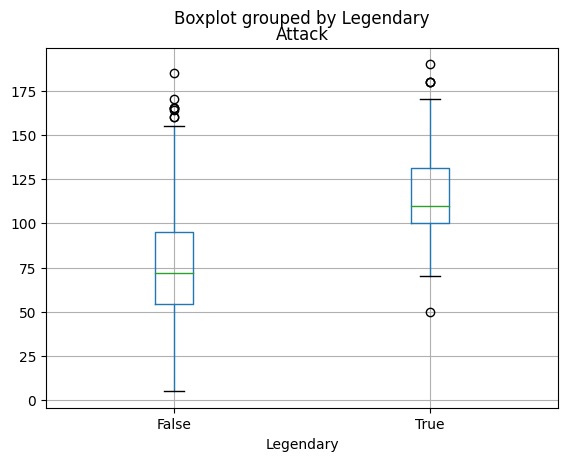

In [11]:
data.boxplot(column = 'Attack', by = 'Legendary')

In [12]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [13]:
melted = pd.melt(frame = data_new, id_vars = 'Name', value_vars = ['Speed', 'Defense'])
melted

,Name,variable,value
0,Bulbasaur,Speed,45
1,Ivysaur,Speed,60
2,Venusaur,Speed,80
3,Mega Venusaur,Speed,80
4,Charmander,Speed,65
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [15]:
melted.pivot(index = 'Name', columns = 'variable', values='value')

variable,Defense,Speed
Name,,
Bulbasaur,49,45
Charmander,43,65
Ivysaur,63,60
Mega Venusaur,123,80
Venusaur,83,80


In [21]:
data1 = data.head()
data2 = data.tail()

conc_data = pd.concat([data1,data2],axis =0, ignore_index = True)
conc_data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [23]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()

conc_data_col = pd.concat([data1,data2],axis =1)
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [25]:
data['Speed'] = data.Speed.astype('float')

data.dtypes

#               int64
Name           object
Type 1         object
Type 2         object
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed         float64
Generation      int64
Legendary        bool
dtype: object

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   #           800 non-null    int64  
 1   Name        799 non-null    object 
 2   Type 1      800 non-null    object 
 3   Type 2      414 non-null    object 
 4   HP          800 non-null    int64  
 5   Attack      800 non-null    int64  
 6   Defense     800 non-null    int64  
 7   Sp. Atk     800 non-null    int64  
 8   Sp. Def     800 non-null    int64  
 9   Speed       800 non-null    float64
 10  Generation  800 non-null    int64  
 11  Legendary   800 non-null    bool   
dtypes: bool(1), float64(1), int64(7), object(3)
memory usage: 69.7+ KB


In [29]:
data['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [34]:
data1 = data 
data1['Type 2'].dropna(inplace =True)

In [35]:
assert 1==1

In [41]:
#assert data['Type 2'].notnull().all()

In [39]:
data['Type 2'].fillna('empty',inplace=True)

In [40]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
4,5,Charmander,Fire,empty,39,52,43,60,50,65.0,1,False


In [42]:
assert data['Type 2'].notnull().all()

Time Series data

In [45]:
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1992-03-15","1992-03-16"]

datetime_object = pd.to_datetime(date_list)
data2['date'] = datetime_object

#lets make date as index
data2 = data2.set_index('date')
data2

TypeError: 'method' object does not support item assignment